In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../LP-1 Dataset/K-Means & Hirarchical Clustering/cities_r2.csv')

In [4]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [5]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       name_of_city  state_code      state_name  dist_code  population_total  \
0          Abohar            3          PUNJAB          9            145238   
1        Achalpur           27     MAHARASHTRA          7            112293   
2        Adilabad           28  ANDHRA PRADESH          1            117388   
3       Adityapur           20       JHARKHAND         24            173988   
4           Adoni           28  ANDHRA PRADESH         21            166537   
..             ...         ...             ...        ...               ...   
488  Vizianagaram           28  ANDHRA PRADESH         12            227533   
489      Warangal           28  ANDHRA PRADESH          9            620116   
490        Wardha           27     MAHARASHTRA          8            105543   
491   Yamunanagar            6         HARYANA          3            216628   
492      Yavatmal           27     MAHARASHTRA         14            116714   

     pop

In [6]:
df.isna().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [7]:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [9]:
col_list= df.select_dtypes(include='object').columns.tolist()


In [10]:
col_list

['name_of_city', 'state_name', 'location']

In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in col_list:
    df[col] = label.fit_transform(df[col])


In [16]:
df.dtypes

name_of_city                        int32
state_code                          int64
state_name                          int32
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                            int32
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [17]:
import matplotlib.pyplot as plt

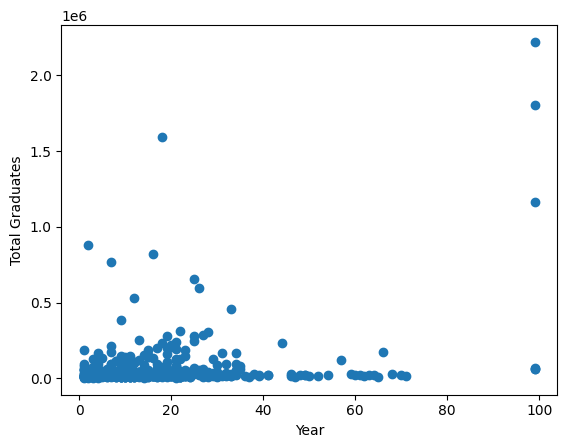

In [26]:
plt.scatter(df['dist_code'], df['total_graduates'])
plt.xlabel('Year')
plt.ylabel('Total Graduates')
plt.show()


In [22]:
df.corr()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
name_of_city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_code,NaN,1.000000,NaN,-0.088946,0.054953,0.048442,0.062276,0.030726,0.025069,0.037050,...,0.078278,0.647582,0.530039,0.387393,0.386657,0.386275,NaN,0.036701,0.038541,0.034332
state_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dist_code,NaN,-0.088946,NaN,1.000000,0.318398,0.319937,0.316385,0.318881,0.318189,0.319461,...,0.312612,-0.071230,-0.006449,0.005983,-0.003357,0.011688,NaN,0.322658,0.323013,0.321438
population_total,NaN,0.054953,NaN,0.318398,1.000000,0.999647,0.999547,0.991590,0.989977,0.992786,...,0.997831,-0.127811,-0.027147,0.079707,0.039787,0.100713,NaN,0.977282,0.976239,0.976206
population_male,NaN,0.048442,NaN,0.319937,0.999647,1.000000,0.998395,0.991738,0.990528,0.992482,...,0.996611,-0.139004,-0.034290,0.077046,0.037451,0.097581,NaN,0.974116,0.972722,0.973484
population_female,NaN,0.062276,NaN,0.316385,0.999547,0.998395,1.000000,0.990577,0.988509,0.992283,...,0.998361,-0.115034,-0.019040,0.082651,0.042396,0.104171,NaN,0.980032,0.979389,0.978455
0-6_population_total,NaN,0.030726,NaN,0.318881,0.991590,0.991738,0.990577,1.000000,0.999740,0.999673,...,0.983815,-0.158482,-0.054903,0.050218,0.016279,0.067407,NaN,0.968286,0.968568,0.965591
0-6_population_male,NaN,0.025069,NaN,0.318189,0.989977,0.990528,0.988509,0.999740,1.000000,0.998830,...,0.981337,-0.165095,-0.064842,0.048611,0.015208,0.065270,NaN,0.965461,0.965528,0.963040
0-6_population_female,NaN,0.037050,NaN,0.319461,0.992786,0.992482,0.992283,0.999673,0.998830,1.000000,...,0.985984,-0.150968,-0.043724,0.051988,0.017471,0.069762,NaN,0.970855,0.971378,0.967855


In [27]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [28]:
km = KMeans()

In [29]:
sse = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['dist_code', 'total_graduates']])
    sse.append(kmeans.inertia_)

In [30]:
sse

[15556783595032.945,
 4376800506012.3774,
 1962217734864.2815,
 925869265906.5062,
 721010648156.4406,
 515222052019.8916,
 397256671193.83374,
 302470823790.1543,
 155992435954.24646,
 128916190303.76723,
 110780410473.30226,
 81808264312.7038,
 65965970872.04335,
 58278997528.09316,
 43023027782.199036]

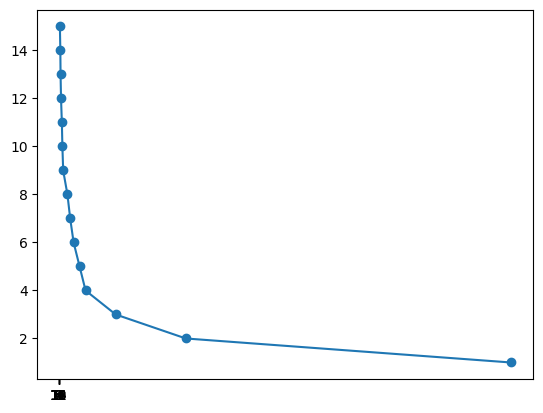

In [32]:
plt.xticks(range(1, 16))
plt.plot(sse,range(1, 16),marker='o')

In [43]:
km = KMeans(n_clusters=2)
labels = km.fit_predict(df[['dist_code', 'total_graduates']])


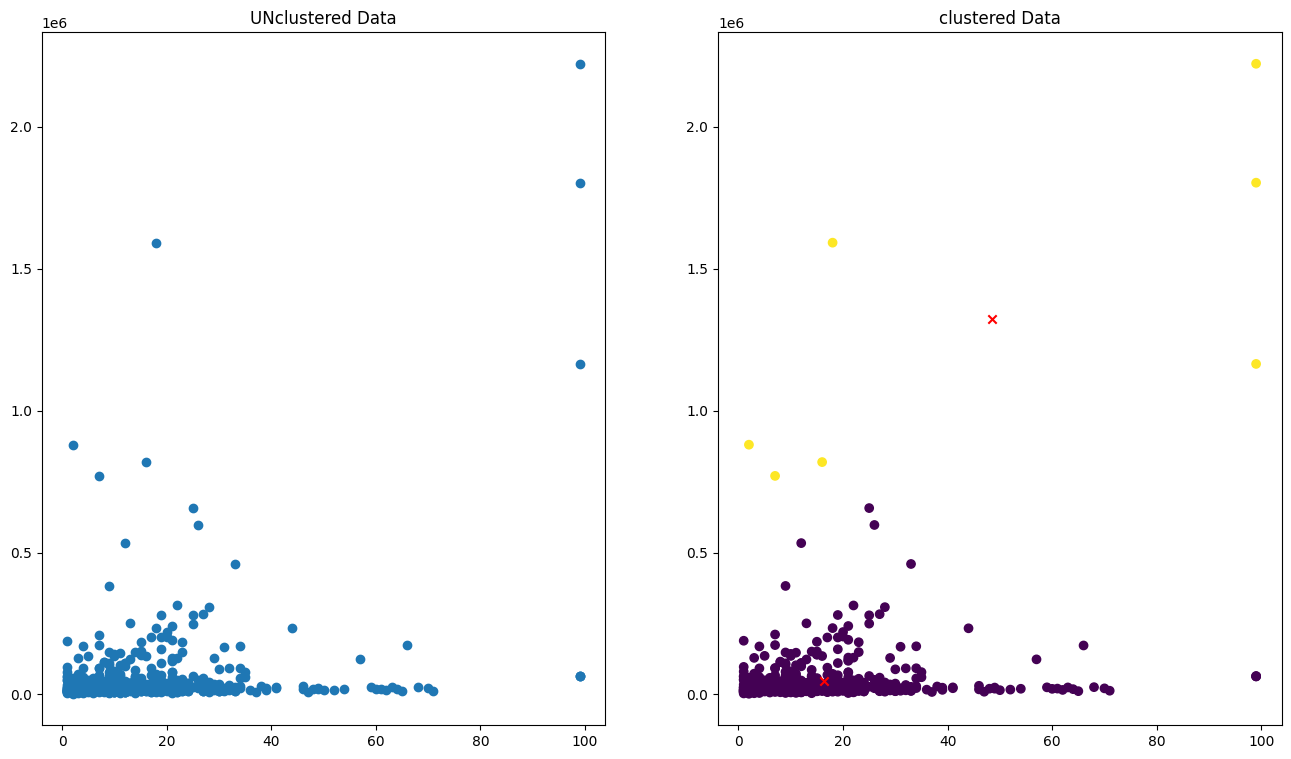

In [44]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("UNclustered Data")
plt.scatter(df['dist_code'], df['total_graduates'])

plt.subplot(1,2,2)
plt.title("clustered Data")
plt.scatter(df['dist_code'], df['total_graduates'],c=labels)

centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='x',color='red')

In [45]:
km.inertia_

4376800506012.3774

In [47]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['dist_code', 'total_graduates']], kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5324994459919892


In [50]:
silh = []

for i in (2,16):
    km = KMeans(n_clusters = i)
    labels = km.fit_predict(df[['dist_code', 'total_graduates']])
    a = silhouette_score(df[['dist_code', 'total_graduates']], labels, metric='euclidean')
    silh.append(a)

In [51]:
silh

[0.9467905021885259, 0.5717849294701591]

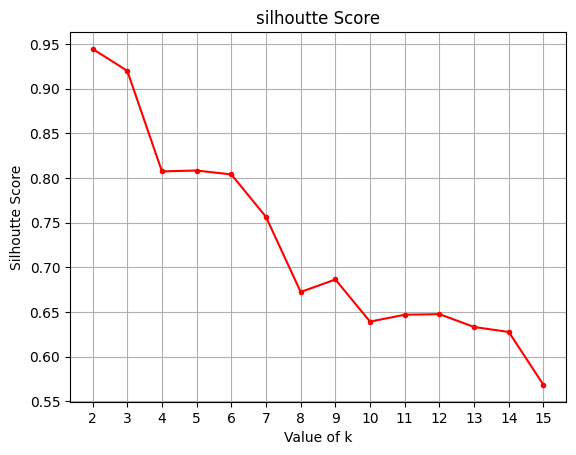

In [57]:
silh = []

for i in range(2,16):
    km = KMeans(n_clusters = i)
    labels = km.fit_predict(df[['dist_code', 'total_graduates']])
    a = silhouette_score(df[['dist_code', 'total_graduates']], labels, metric='euclidean')
    silh.append(a)

plt.title("silhoutte Score")
plt.xlabel("Value of k")
plt.ylabel("Silhoutte Score")
plt.grid()
plt.xticks(range(2,16))
plt.plot(range(2,16),silh,marker='.',color='red')


In [58]:
ag = AgglomerativeClustering()

In [59]:
ag.fit_predict(df[['dist_code', 'total_graduates']])

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,